1. Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Define dataset path

In [2]:
TRAIN_PATH = "E:/project_intro_ml_dm/train.csv"
TRAIN_LABELS_PATH = "E:/project_intro_ml_dm/train_labels.csv"

3. Load data

In [3]:
dtypes = {
    "session_id": 'int64',
    "index": np.int32,
    "elapsed_time": np.int32,
    "event_name": 'category',
    "name": 'category',
    "level": np.int8,
    "page": np.float32,
    "room_coor_x": np.float32,
    "room_coor_y": np.float32,
    "screen_coor_x": np.float32,
    "screen_coor_y": np.float32,
    "hover_duration": np.float32,
    "text": 'category',
    "fqid": 'category',
    "room_fqid": 'category',
    "text_fqid": 'category',
    "fullscreen": np.int8,
    "hq": np.int8,
    "music": np.int8,
    "level_group": 'category'
}

In [4]:
train_raw = pd.read_csv(TRAIN_PATH, dtype=dtypes)
train_raw.head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991394,-159.314682,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4


4. EDA

In [5]:
print(f"The training dataset has {train_raw.shape[0]} rows and {train_raw.shape[1]} columns")

The training dataset has 26296946 rows and 20 columns


In [6]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26296946 entries, 0 to 26296945
Data columns (total 20 columns):
 #   Column          Dtype   
---  ------          -----   
 0   session_id      int64   
 1   index           int32   
 2   elapsed_time    int32   
 3   event_name      category
 4   name            category
 5   level           int8    
 6   page            float32 
 7   room_coor_x     float32 
 8   room_coor_y     float32 
 9   screen_coor_x   float32 
 10  screen_coor_y   float32 
 11  hover_duration  float32 
 12  text            category
 13  fqid            category
 14  room_fqid       category
 15  text_fqid       category
 16  fullscreen      int8    
 17  hq              int8    
 18  music           int8    
 19  level_group     category
dtypes: category(7), float32(6), int32(2), int64(1), int8(4)
memory usage: 1.3 GB


In [7]:
train_raw.describe()

,session_id,index,elapsed_time,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,fullscreen,hq,music
count,2.629695e+07,2.629695e+07,2.629695e+07,2.629695e+07,564544.000000,2.422367e+07,2.422367e+07,2.422367e+07,2.422367e+07,2.002244e+06,2.629695e+07,2.629695e+07,2.629695e+07
mean,2.113249e+16,6.445102e+02,4.016694e+06,1.219169e+01,3.166559,-5.490582e+01,-1.162119e+02,4.584099e+02,3.855858e+02,3.471006e+03,1.370037e-01,1.202047e-01,9.293778e-01
std,5.712953e+14,5.457880e+02,3.127032e+07,6.497789e+00,2.063291,5.202926e+02,2.184710e+02,2.479389e+02,1.298166e+02,4.602024e+05,3.438513e-01,3.252008e-01,2.561926e-01
min,2.009031e+16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-1.992355e+03,-9.181624e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.101022e+16,2.880000e+02,4.397000e+05,6.000000e+00,1.000000,-3.528395e+02,-2.127183e+02,2.690000e+02,3.040000e+02,9.900000e+01,0.000000e+00,0.000000e+00,1.000000e+00
50%,2.104021e+16,5.950000e+02,1.014801e+06,1.300000e+01,3.000000,-1.116280e+01,-9.760534e+01,4.470000e+02,3.970000e+02,4.190000e+02,0.000000e+00,0.000000e+00,1.000000e+00
75%,2.110052e+16,8.960000e+02,1.747040e+06,1.800000e+01,5.000000,2.966515e+02,2.268786e+01,6.630000e+02,4.710000e+02,1.266000e+03,0.000000e+00,0.000000e+00,1.000000e+00
max,2.210022e+16,2.047300e+04,1.988607e+09,2.200000e+01,6.000000,1.261774e+03,5.436164e+02,1.919000e+03,1.440000e+03,2.451637e+08,1.000000e+00,1.000000e+00,1.000000e+00


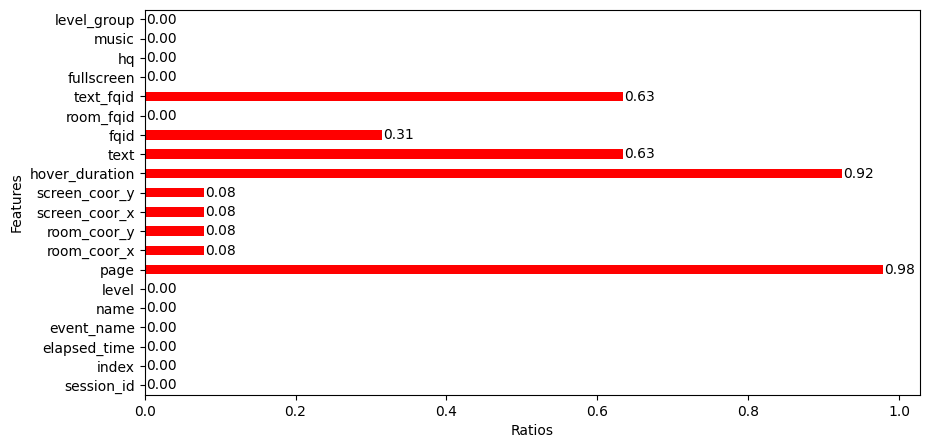

In [8]:
# Percentage of missing values
missing_ratios = train_raw.isna().sum()/train_raw.shape[0]
plt.figure(figsize=(10, 5))
ax = missing_ratios.plot.barh(color="red", width=0.5)
ax.bar_label(ax.containers[0], padding=1, fmt='%.2f')
plt.xlabel("Ratios")
plt.ylabel("Features")
plt.show()

In [9]:
CAT_COLS = ['event_name', 'name', 'text', 'fqid', 'room_fqid', 'text_fqid']
NUM_COLS = ['index', 'elapsed_time', 'level', 'page', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y','hover_duration', 'fullscreen', 'hq', 'music']

Number of event names: 11
Number of names: 6


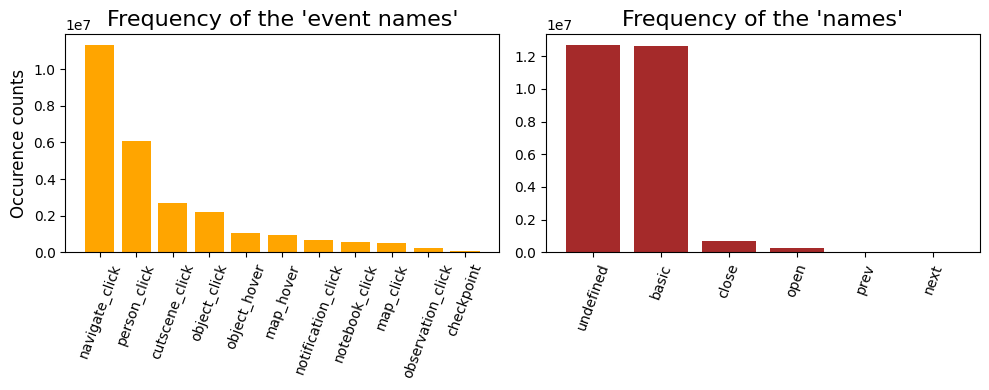

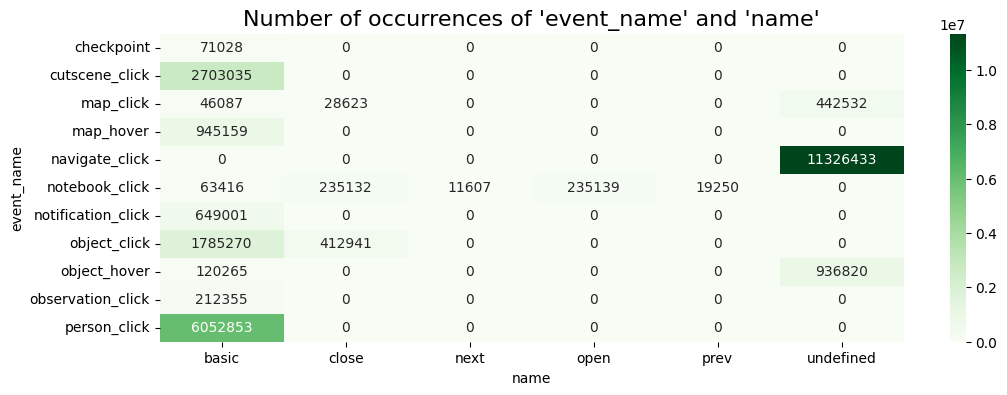

In [10]:
event_names = train_raw['event_name'].value_counts()
names = train_raw['name'].value_counts()

print("Number of event names:", len(event_names))
print("Number of names:", len(names))

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar(event_names.index, event_names.values, color='orange')
plt.ylabel("Occurence counts", fontsize=12)
plt.title("Frequency of the 'event names'", fontsize=16)
plt.xticks(rotation=70)

plt.subplot(1, 2, 2)
plt.bar(names.index, names.values, color='brown')
plt.title("Frequency of the 'names'", fontsize=16)
plt.xticks(rotation=70)

plt.tight_layout()
plt.show()

# Pivot table
pivot_table = train_raw.pivot_table(index='event_name', columns='name', aggfunc='size')
pivot_table = pivot_table.fillna(0).astype(int)
plt.figure(figsize=(12, 4))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Greens')
plt.title("Number of occurrences of 'event_name' and 'name'", fontsize=16)
plt.show()

## EDA Labels

In [11]:
labels = pd.read_csv(TRAIN_LABELS_PATH)
labels['session'] = labels.session_id.apply(lambda x: int(x.split('_')[0]))
labels['q'] = labels.session_id.apply(lambda x: int(x.split('_')[-1][1:]))
labels.head(5)

,session_id,correct,session,q
0,20090312431273200_q1,1,20090312431273200,1
1,20090312433251036_q1,0,20090312433251036,1
2,20090312455206810_q1,1,20090312455206810,1
3,20090313091715820_q1,0,20090313091715820,1
4,20090313571836404_q1,1,20090313571836404,1


<AxesSubplot:xlabel='correct'>

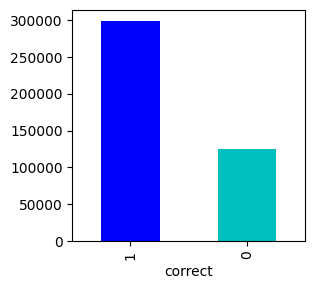

In [12]:
plt.figure(figsize=(3, 3))
plot_df = labels.correct.value_counts()
plot_df.plot(kind="bar", color=['b', 'c'])

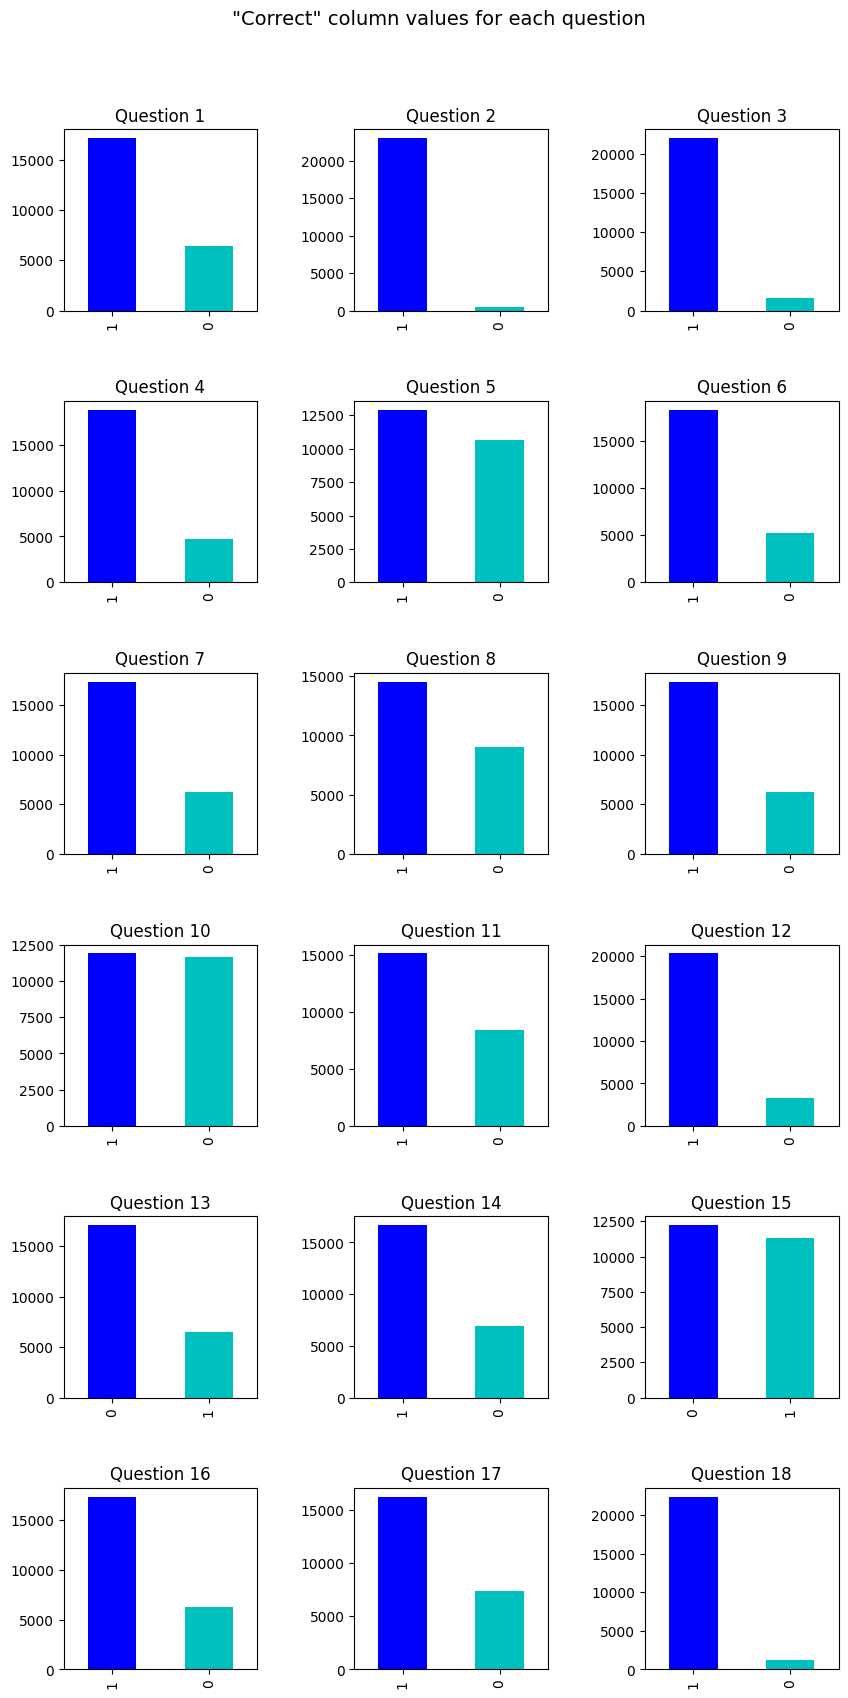

In [13]:
plt.figure(figsize=(10, 20))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle("\"Correct\" column values for each question", fontsize=14, y=0.94)
for n in range(1,19):
    #print(n, str(n))
    ax = plt.subplot(6, 3, n)

    # filter df and plot ticker on the new subplot axis
    plot_df = labels.loc[labels.q == n]
    plot_df = plot_df.correct.value_counts()
    plot_df.plot(ax=ax, kind="bar", color=['b', 'c'])
    
    # chart formatting
    ax.set_title("Question " + str(n))
    ax.set_xlabel("")